In [2]:
import matplotlib.pyplot as plt
import cv2 #openCV

In [3]:
cat4 = cv2.imread(r'C:\Users\avata\Desktop\New folder\ML\Computer Vision\Class 3\CATS_DOGS\test\CAT\9377.jpg')

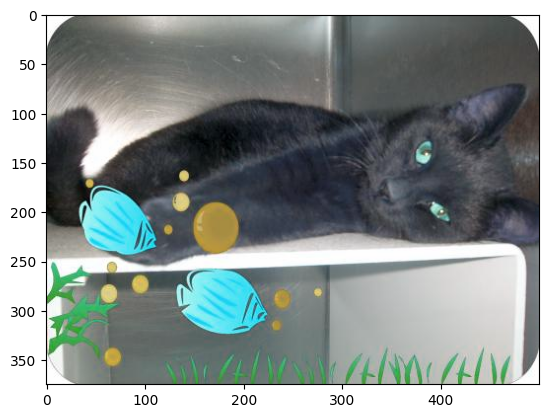

In [4]:
plt.imshow(cat4)

In [5]:
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)

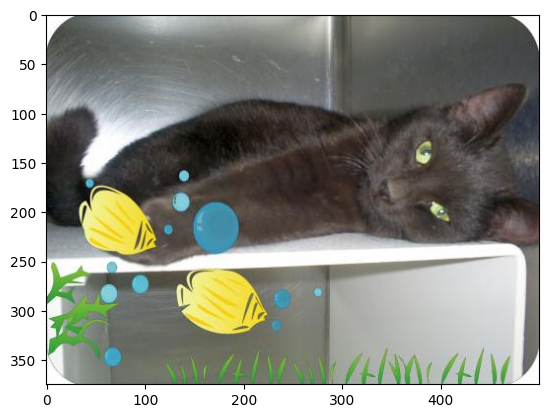

In [6]:
plt.imshow(cat4)

In [7]:
type(cat4)

numpy.ndarray

In [8]:
cat4.shape

(375, 500, 3)

In [9]:
dog = cv2.imread(r'C:\Users\avata\Desktop\New folder\ML\Computer Vision\Class 3\CATS_DOGS\test\DOG\9377.jpg')

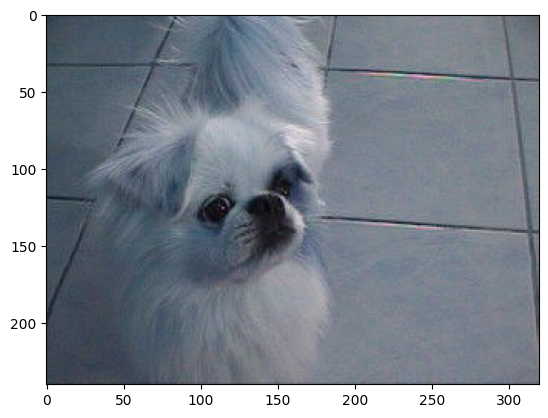

In [10]:
plt.imshow(dog)

In [11]:
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

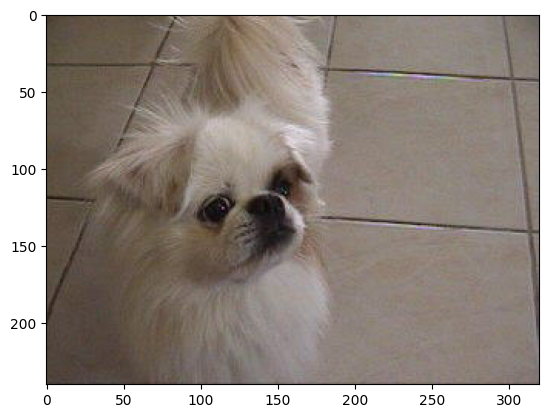

In [12]:
plt.imshow(dog)

In [13]:
dog.shape

(240, 320, 3)

# Image Data Generator

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen = ImageDataGenerator(rotation_range = 30, # rotates (30 degrees)
                              width_shift_range = 0.1, # Shift the pic width by a max of 10%# Range increase
                              height_shift_range = 0.1, # Shift the pic height by a max of 10%
                              rescale = 1/255, # Rescale # Rescale the image by normalzing it.
                              shear_range = 0.2, # Shear means cutting away part of the image (max 20%)
                              zoom_range = 0.2, # Zoom in by 20% max
                              horizontal_flip = True, # Allo horizontal flipping
                              fill_mode = 'nearest' # Fill in missing pixels with the nearest filled value
                              )

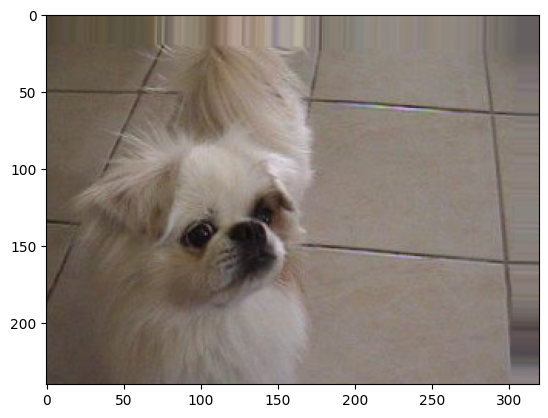

In [ ]:
plt.imshow(image_gen.random_transform(dog))

# Getting Dataset from our Local Device

In [ ]:
image_gen.flow_from_directory(r'C:\Users\avata\Desktop\New folder\ML\Computer Vision\Class 3\CATS_DOGS\train')

Found 18743 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(r'C:\Users\avata\Desktop\New folder\ML\Computer Vision\Class 3\CATS_DOGS\test')

Found 6251 images belonging to 2 classes.


In [ ]:
image_shape = (160,150,3)

# Creating the Model

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Flatten, Dropout, Dense, Conv2D, MaxPooling2D

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (2,2), input_shape = image_shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (4,4), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))


# Output Layer
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

# Training the Model

Generating many manipulated images from a directory
In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The
directories should only contain images of one class, so one folder per class of images.

Structure Needed:

Image Data Folder
- Class 1
    - o 0.jpg
    - o 1.jpg

- Class 2
    - o 0.jpg
    - o 1.jpg
    - o ...

    . ...
- Class n

In [ ]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory(r'C:\Users\avata\Desktop\New folder\ML\Computer Vision\Class 3\CATS_DOGS\train',
                                               target_size = (160,150), #(160,150) target_size = image_shape[:2]
                                               batch_size = batch_size,
                                               class_mode = 'binary')

Found 18743 images belonging to 2 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory(r'C:\Users\avata\Desktop\New folder\ML\Computer Vision\Class 3\CATS_DOGS\test',
                                               target_size = (160,150), #(160,150) target_size = image_shape[:2]
                                               batch_size = batch_size,
                                               class_mode = 'binary')

Found 6251 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [ ]:
results = model.fit(train_image_gen, epochs = 10,
                             steps_per_epoch = 1172,
                             validation_data = test_image_gen,
                             validation_steps = 391)

Epoch 1/10


 927/1172 [======================>.......] - ETA: 4:24 - loss: 0.6877 - accuracy: 0.5455

C:\Users\avata\anaconda3\Lib\site-packages\PIL\TiffImagePlugin.py:890: UserWarning: Truncated File Read
  warnings.warn(str(msg))


1172/1172 [==============================] - 1340s 1s/step - loss: 0.6822 - accuracy: 0.5599 - val_loss: 0.6716 - val_accuracy: 0.5943
Epoch 2/10
1172/1172 [==============================] - 843s 719ms/step - loss: 0.6215 - accuracy: 0.6615 - val_loss: 0.5860 - val_accuracy: 0.6876
Epoch 3/10
1172/1172 [==============================] - 798s 681ms/step - loss: 0.5580 - accuracy: 0.7190 - val_loss: 0.5265 - val_accuracy: 0.7373
Epoch 4/10
1172/1172 [==============================] - 802s 685ms/step - loss: 0.5239 - accuracy: 0.7412 - val_loss: 0.4973 - val_accuracy: 0.7607
Epoch 5/10
1172/1172 [==============================] - 805s 687ms/step - loss: 0.4921 - accuracy: 0.7669 - val_loss: 0.5001 - val_accuracy: 0.7644
Epoch 6/10
1172/1172 [==============================] - 802s 684ms/step - loss: 0.4756 - accuracy: 0.7751 - val_loss: 0.4498 - val_accuracy: 0.7922
Epoch 7/10
1172/1172 [==============================] - 801s 684ms/step - loss: 0.4541 - accuracy: 0.7866 - val_loss: 0.4315 

# Loading and Running Interference on the Model

In [1]:
from tensorflow.keras.models import load_model

In [3]:
import h5py

In [4]:
new_model = load_model(r'C:\Users\avata\Desktop\New folder\ML\Computer Vision\Class 3\cat_dog_100epochs.h5')

In [21]:
from tensorflow.keras.preprocessing import image

In [22]:
dog_file = r'C:\Users\avata\Desktop\New folder\ML\Computer Vision\Class 3\CATS_DOGS\test\DOG\9389.jpg'

In [25]:
dog_img = image.load_img(dog_file, target_size = (150,150))

In [26]:
dog_img = image.img_to_array(dog_img)

In [27]:
dog_img.shape

(150, 150, 3)

In [28]:
import numpy as np

dog_img = np.expand_dims(dog_img, axis = 0)

In [29]:
dog_img.shape

(1, 150, 150, 3)

In [30]:
dog_image = dog_img/255

In [31]:
prediction_prob = new_model.predict(dog_img)
predicted_class = np.argmax(prediction_prob, axis = 1)

1/1 [==============================] - 2s 2s/step


In [32]:
prediction_prob

array([[1.]], dtype=float32)

In [33]:
predicted_class

array([0], dtype=int64)